Problem Statement :-Clustering the countries by performing K-means(Elbow method) and Hierarchial Clustering Algorithms.

Importing all the necessary libraries and modules to make our model.

In [1]:
import numpy as nm       
import pandas as pd  
import warnings 
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
%matplotlib inline
import seaborn as sns
import os

Loading the dataset into the model.

In [2]:
df =pd.read_csv('Country-data.csv') 
dataset = pd.read_csv('data-dictionary.csv')  
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


By this pandas function we are getting the information about the dataset like whether there is null values there or not in the dataset and their datatypes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


from above describe we are understanding that there is outliers present in the given dataset but not definitely and we can also observe there maximum and minimum values in the describe function.It also includes its twenty-five percent and seventy-five percent values.

Now we will see the dataframe and how many rows and coloumns present in this.

In [5]:
df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


NameError: name 'df' is not defined

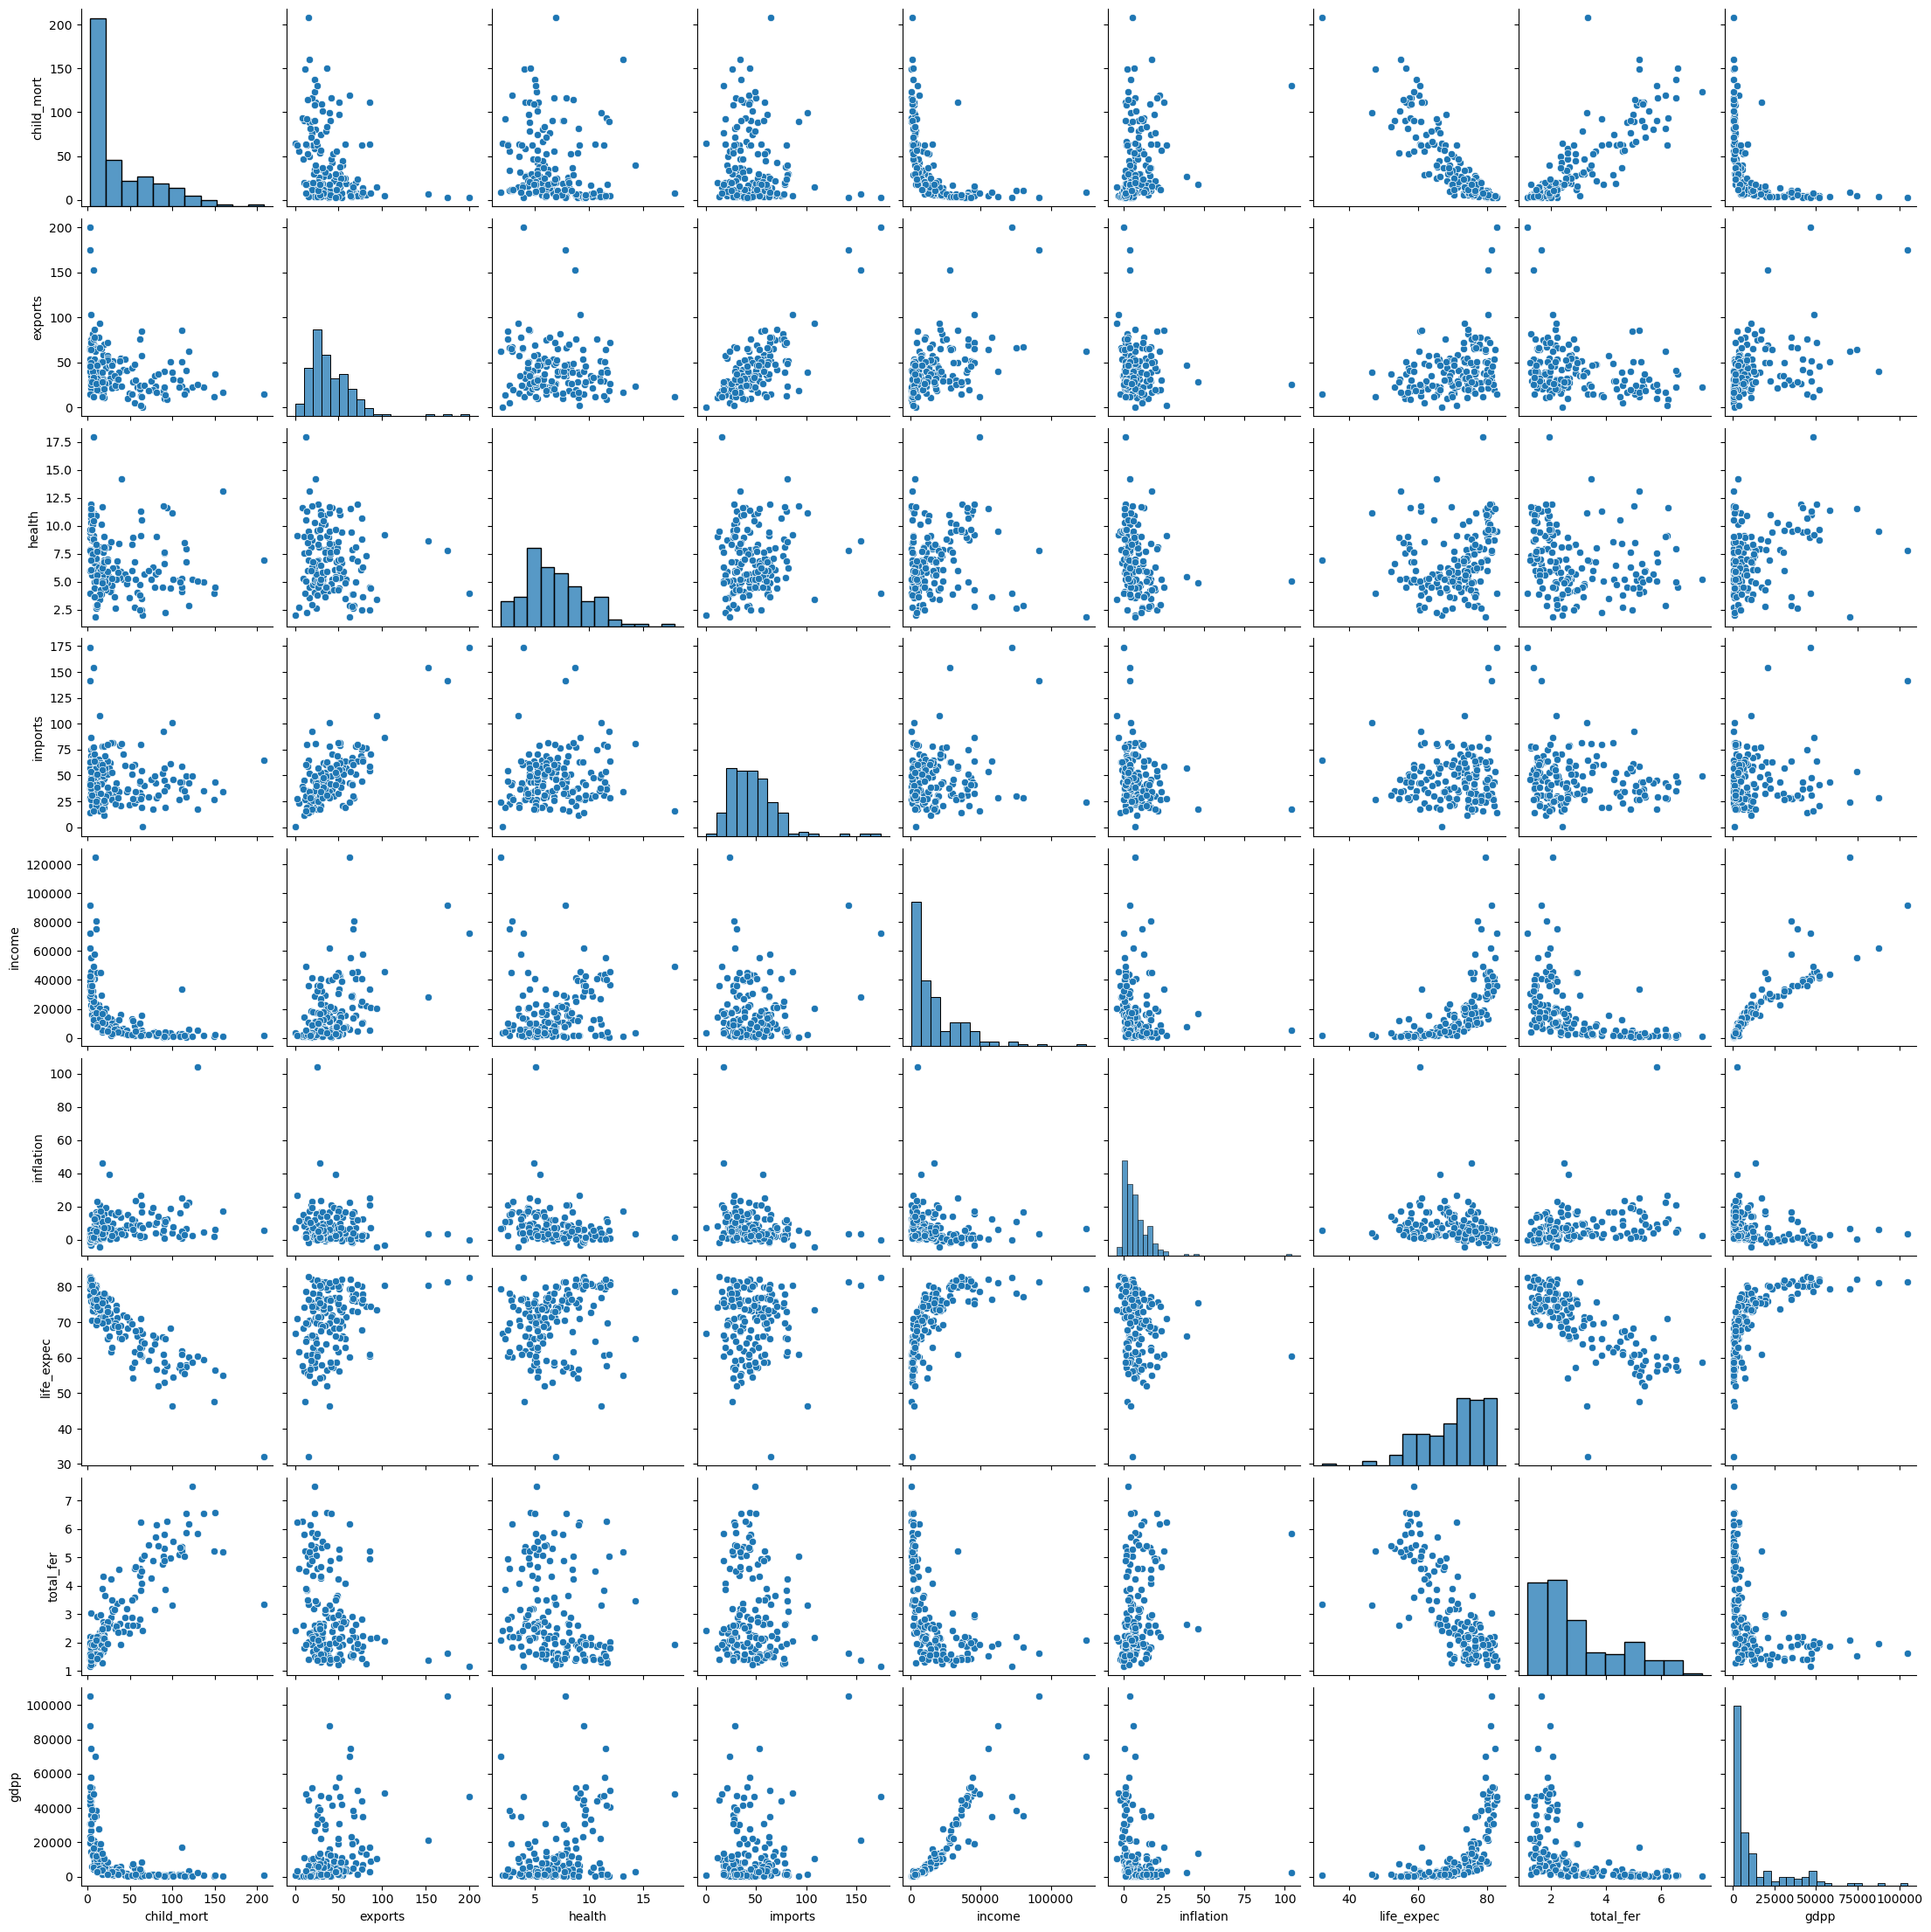

In [9]:
sns.pairplot(df)

From the above pairplot we can know that income and gdp has a good relation and in going advance we will also see the heat map for checking co-relations between the parameters.

<AxesSubplot: >

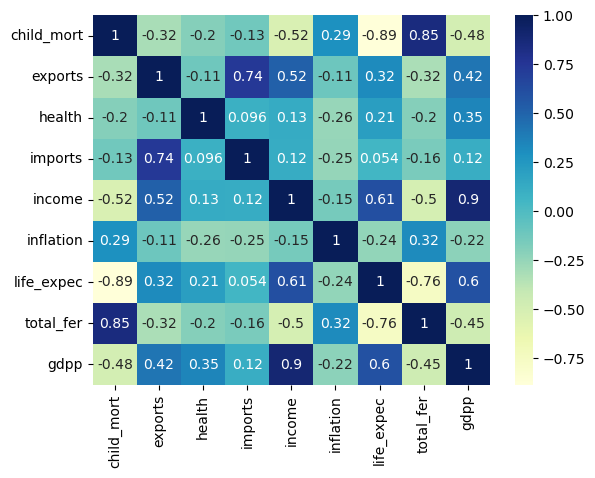

In [10]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

From the above we came to know that there is a good corelation between the income and gdp and also there is a bad corelation between imports and health.So,we should not take that parameters.

Now we plot the two parameters the income and gdp with the help of scatter plot.

<AxesSubplot: xlabel='income', ylabel='gdpp'>

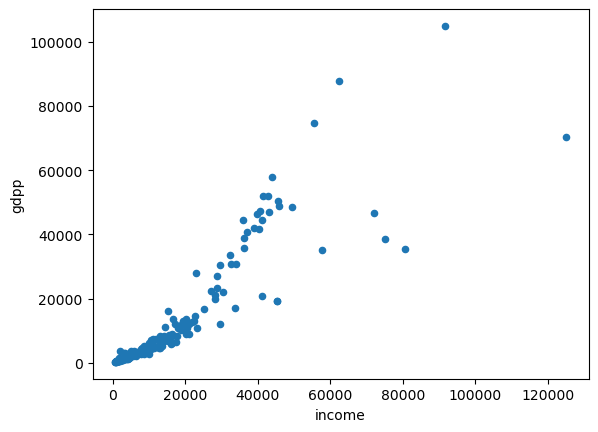

In [11]:
df.plot.scatter(x='income',y='gdpp')

<AxesSubplot: >

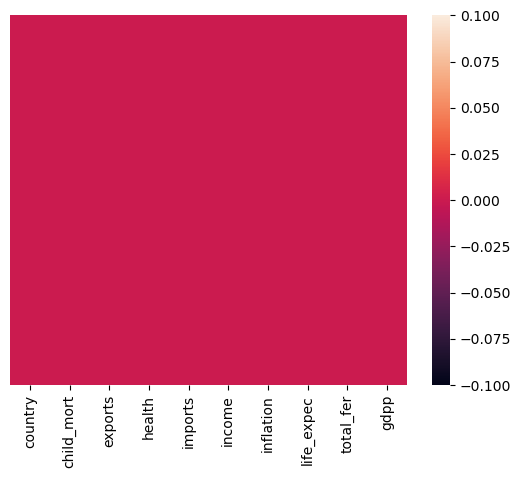

In [12]:
sns.heatmap(df.isnull(),yticklabels=False)

From this heatmap we can understood that there is no null value in the dataset.

<AxesSubplot: xlabel='income', ylabel='Density'>

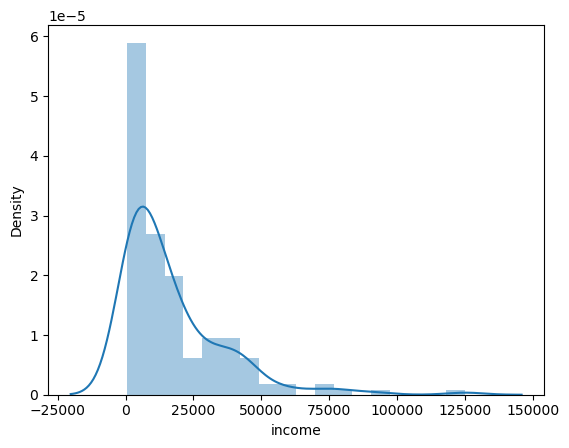

In [13]:
sns.distplot(df['income'])

From this distance plot we can know the maximum and minimum values of the income with respective to the density.

<AxesSubplot: >

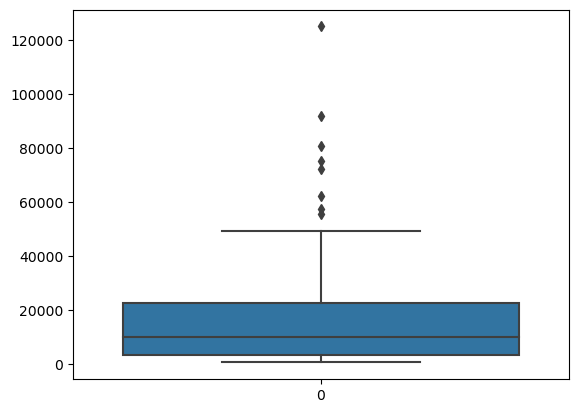

In [14]:
sns.boxplot(df['income'])

From the above box plot we can clearly see that there is outliers present in the income .So,we have to remove the outliers.We have three methods,

1.Z-score method

2.Inter-quartile method(IQR)

3.Binning or capping.

We can see the outliers clearly

let's see if we apply z-score method what happens

In [15]:
upper_limit = df['income'].mean() + 3*df['income'].std()
lower_limit = df['income'].mean() - 3*df['income'].std()
print('upper limit =',upper_limit)
print('lower_limit =',lower_limit)

upper limit = 74978.8917157275
lower_limit = -40689.51447021852


Primarily,we displayed the upper_limit and Lower_limit

In [16]:
df.loc[(df['income'] > upper_limit) | (df['income'] < lower_limit)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


Now what are the rows that are having outliers has been displayed.
outlier values

In [17]:
new_df = df.loc[(df['income'] < upper_limit) & (df['income'] > lower_limit)]
print('before removing outliers :',len(df))
print('after removing outliers :',len(new_df))

before removing outliers : 167
after removing outliers : 163


From the above output we can see that the rows before removing outliers and the rows after removing outliers.

<AxesSubplot: >

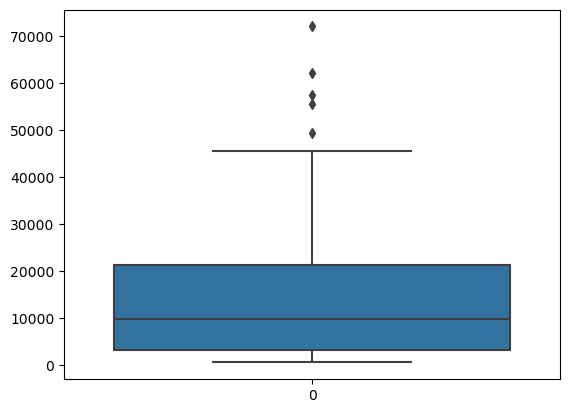

In [18]:
sns.boxplot(new_df['income'])

In [19]:
new_df = df.copy()
new_df.loc[(new_df['income'] > upper_limit) ,'income' ]=upper_limit
new_df.loc[(new_df['income'] < lower_limit) ,'income' ]=lower_limit

We are simply copying our dataframe to new dataframe

<AxesSubplot: >

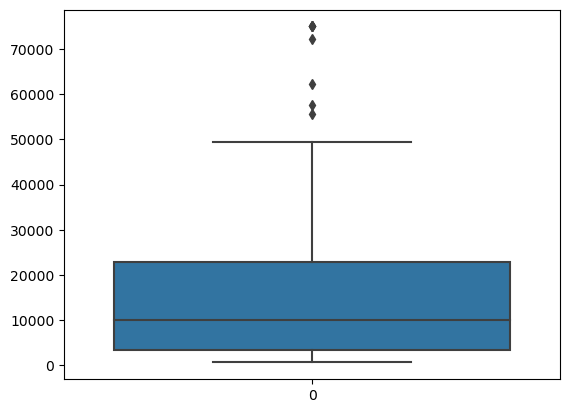

In [20]:
sns.boxplot(new_df['income'])

In [21]:
len(new_df)

167

In [22]:
new_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,16710.051299,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,17433.567598,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,74978.891716,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot: >

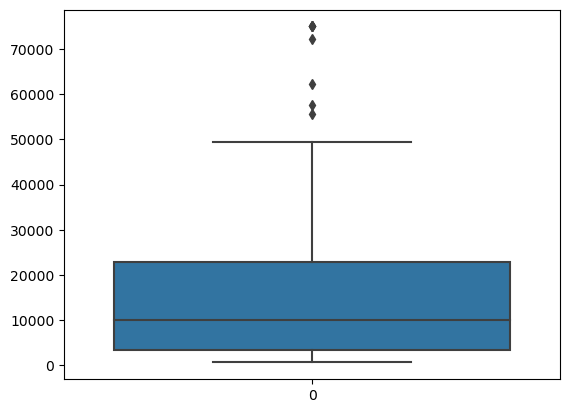

In [23]:
sns.boxplot(new_df['income'])

We are applying the z-score method 2times for more accuracy

In [24]:
upper_limit = new_df['income'].mean() + 3*new_df['income'].std()
lower_limit = df['income'].mean() - 3*new_df['income'].std()
print('upper limit =',upper_limit)
print('lower_limit =',lower_limit)

upper limit = 69010.75409334086
lower_limit = -35156.014172006064


In [25]:
df.loc[(new_df['income'] > upper_limit) | (new_df['income'] < lower_limit)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


Binning the rows which have outliers without deleting the data.

In [26]:
new_df = df.loc[(df['income'] < upper_limit) & (df['income'] > lower_limit)]
print('before removing outliers :',len(df))
print('after removing outliers :',len(new_df))

before removing outliers : 167
after removing outliers : 162


there are five rows which has the outliers so we are binning the rows

<AxesSubplot: >

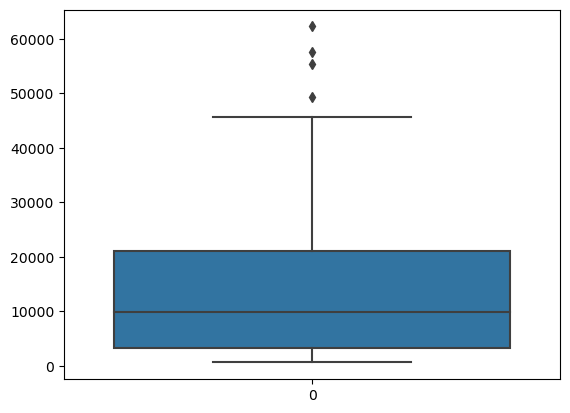

In [27]:
sns.boxplot(new_df['income'])

After applying the z-score method also we are having the outliers So we decided to take the help of IQR method.


In [28]:
new_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,39.229630,38.850611,6.908704,45.879419,14929.401235,7.784642,70.271605,2.984012,11538.975309
std,40.565738,22.143078,2.711419,20.964787,14379.403642,10.684157,8.871557,1.521491,16035.073396
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,8.600000,23.575000,5.002500,30.725000,3325.000000,1.790000,64.775000,1.815000,1310.000000
50%,20.050000,34.900000,6.400000,43.300000,9925.000000,5.265000,72.650000,2.475000,4550.000000
75%,62.200000,50.575000,8.710000,58.475000,21100.000000,10.475000,76.575000,4.037500,12825.000000
max,208.000000,153.000000,17.900000,154.000000,62300.000000,104.000000,82.800000,7.490000,87800.000000


We are displaying again the new dataframe but here we can see the changes that max value is decreased.

In [29]:
print(new_df.isnull().sum())


new_df.dropna(inplace=True)


Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

new_df_norm = (new_df - new_df.mean()) / new_df.std()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


<AxesSubplot: >

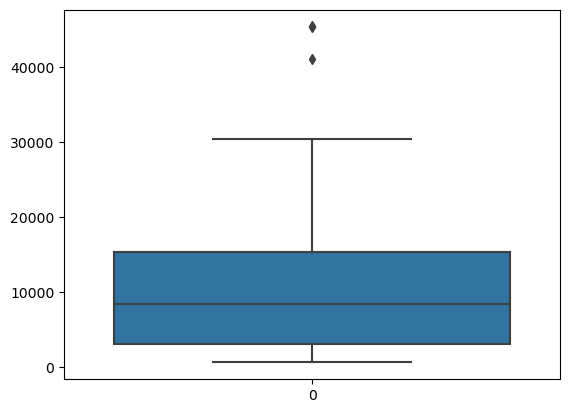

In [30]:
sns.boxplot(new_df['income'])

Same methods will aslo be applied to the imports feature.


<AxesSubplot: xlabel='imports', ylabel='Density'>

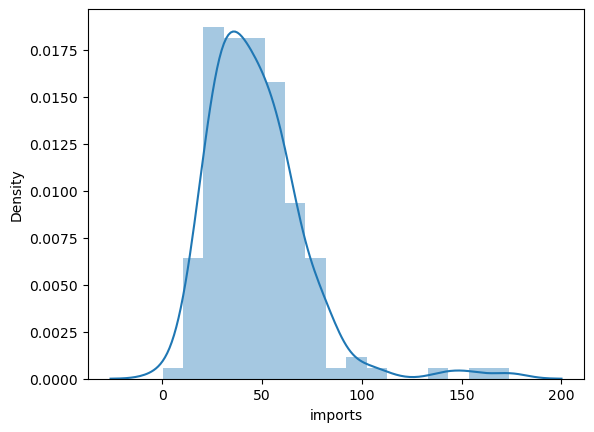

In [31]:
sns.distplot(df['imports'])

<AxesSubplot: >

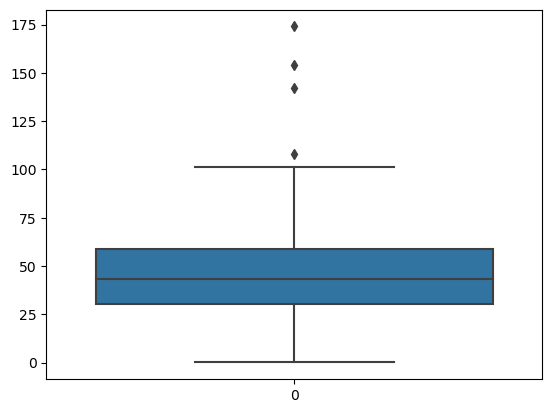

In [32]:
sns.boxplot(df['imports'])

In [33]:
upper_limit = df['imports'].mean() + 3*df['imports'].std()
lower_limit = df['imports'].mean() - 3*df['imports'].std()
print('upper limit =',upper_limit)
print('lower_limit =',lower_limit)

upper limit = 119.51898189838596
lower_limit = -25.738551958266214


In [34]:
df.loc[(df['imports'] > upper_limit) | (df['imports'] < lower_limit)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [35]:
new_df = df.loc[(df['imports'] < upper_limit) & (df['imports'] > lower_limit)]
print('before removing outliers :',len(df))
print('after removing outliers :',len(new_df))

before removing outliers : 167
after removing outliers : 164


<AxesSubplot: >

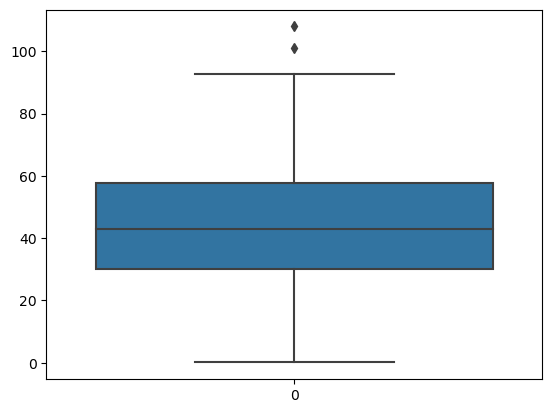

In [36]:
sns.boxplot(new_df['imports'])

In [37]:
new_df = df.copy()
new_df.loc[(new_df['imports'] > upper_limit) ,'imports' ]=upper_limit
new_df.loc[(new_df['imports'] < lower_limit) ,'imports' ]=lower_limit

<AxesSubplot: >

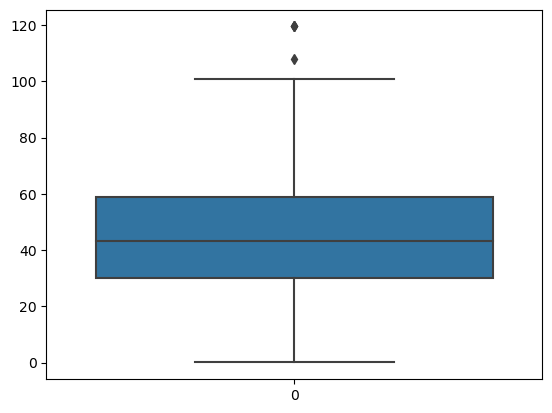

In [38]:
sns.boxplot(new_df['imports'])

In [39]:
new_df = df.copy()
new_df.loc[(new_df['imports'] > upper_limit) ,'imports' ]=upper_limit
new_df.loc[(new_df['imports'] < lower_limit) ,'imports' ]=lower_limit

<AxesSubplot: >

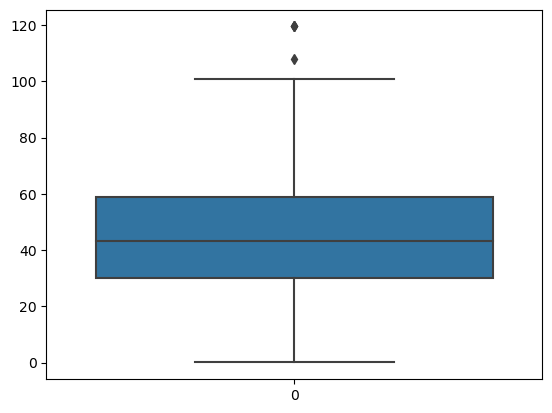

In [40]:
sns.boxplot(new_df['imports'])

In [41]:
len(new_df)

167

In [42]:
new_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.222891,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,21.448800,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,119.518982,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [43]:
print(df.isnull().sum())


df.dropna(inplace=True)


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_norm = (df - df.mean()) / df.std()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [44]:

df['imports'].skew()

0.27048703256146617

In [45]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.799219,37.427336,6.345000,45.127077,11149.851562,7.339727,69.694531,3.020781,6426.187500
std,33.964248,18.794958,2.213079,17.771282,9774.820899,6.145248,7.408596,1.465922,7142.127941
min,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,52.000000,1.230000,231.000000
25%,11.700000,23.550000,4.912500,31.375000,3225.000000,2.255000,64.450000,1.795000,1305.000000
50%,24.100000,34.000000,6.005000,43.500000,8510.000000,5.935000,71.350000,2.600000,3885.000000
75%,62.200000,50.275000,7.790000,57.650000,16050.000000,10.950000,75.850000,4.247500,8412.500000
max,137.000000,86.900000,11.800000,92.600000,45400.000000,23.600000,81.900000,6.550000,30800.000000


<AxesSubplot: >

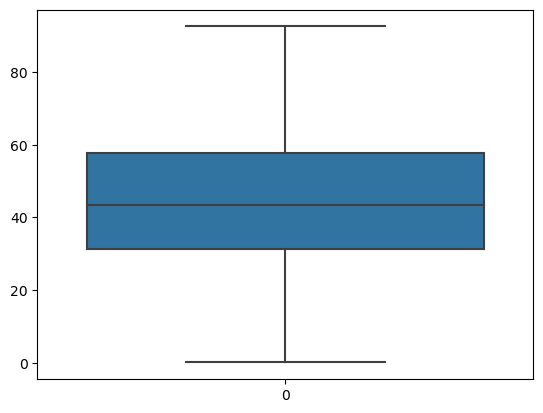

In [46]:
sns.boxplot(df['imports'])

In [47]:
new_df.to_csv('country_data1.csv', index=False)

We are transferring our dataframe to another csv file for performing elbow method and agglomerative clustering

In [48]:
data = pd.read_csv('country_data1.csv')

We are taking the income and gdpp features because they had the highest corelation and they give good accuracy.

In [49]:
features = data[['income', 'gdpp']]

Applying the standardization for the features 

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Performing the Elbow method of k-means.




In [51]:
k_values = range(1, 10)
inertias = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertias.append(model.inertia_)

Plotting the elbow curve of income with respective to the gdpp

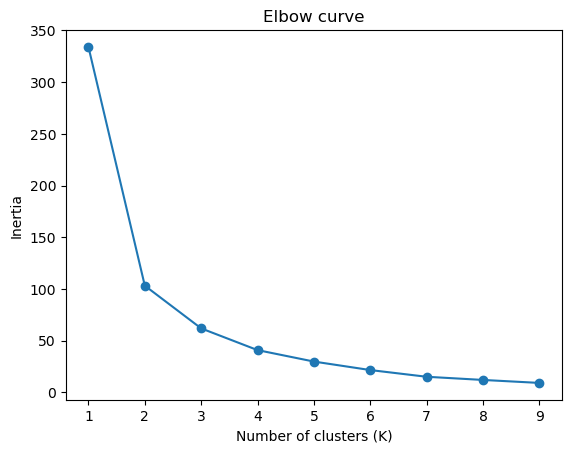

In [52]:
plt.plot(k_values, inertias, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

Performing the agloomerative clustering:

Deciding the number of clusters and dividing the countries.

In [53]:
n_clusters = 3
linkage_method = 'ward'
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
labels = agg_clustering.fit_predict(scaled_features)
model.fit(scaled_features)

KMeans(n_clusters=9, random_state=42)

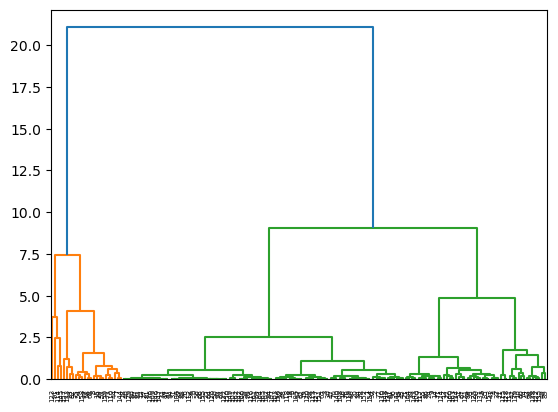

In [54]:

dend = dendrogram(linkage(scaled_features,method = 'ward'))




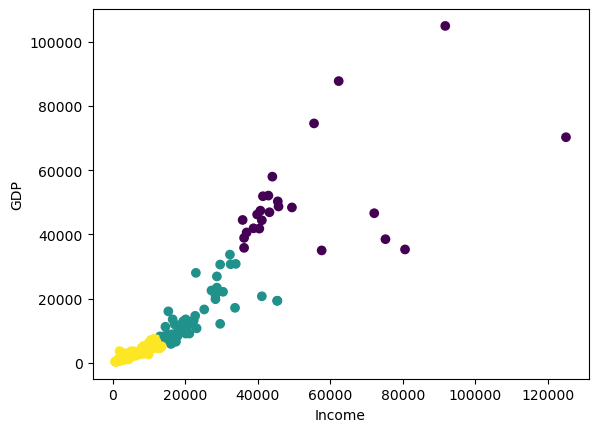

In [55]:
plt.scatter(features['income'], features['gdpp'], c=labels, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.show()

NameError: name 'plt' is not defined